In [31]:
import pandas as pd
df = pd.read_csv("data_exercise1.csv")

In [32]:
df.head(3)

,value,type
0,1.59000,type_1_500_samples
1,65.11050,type_1_500_samples
2,31.76025,type_1_500_samples


In [33]:
df.type.unique()

array(['type_1_500_samples', 'type_2_10000_samples'], dtype=object)

In [48]:
formatted_df = df.value[df.type=='type_2_10000_samples'].to_frame()
formatted_df.columns = ["type_2"]
formatted_df.reset_index(drop=True, inplace=True)
formatted_df['type_1'] = df.value[df.type=='type_1_500_samples']

array([[<AxesSubplot:title={'center':'type_2'}>,
        <AxesSubplot:title={'center':'type_1'}>]], dtype=object)

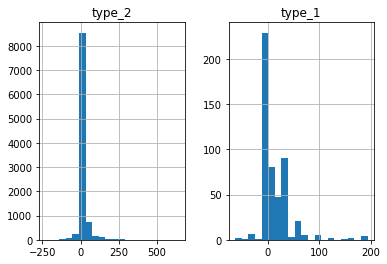

In [53]:
formatted_df.hist(bins=20)

In [90]:
from scipy.stats import describe
print("TYPE 2:")
print(describe(formatted_df.type_2, axis=0))
print("TYPE_1:")
print(describe(formatted_df.type_1.dropna(), axis=0))

TYPE 2:
DescribeResult(nobs=10000, minmax=(-226.03425, 638.385), mean=13.850097314999998, variance=1175.8347037491178, skewness=3.765028725837629, kurtosis=33.58041707643268)
TYPE_1:
DescribeResult(nobs=500, minmax=(-62.39475, 192.9465), mean=15.1228635, variance=863.8534094907241, skewness=2.9673038813437116, kurtosis=13.110844577253904)


In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='value', ylabel='type'>

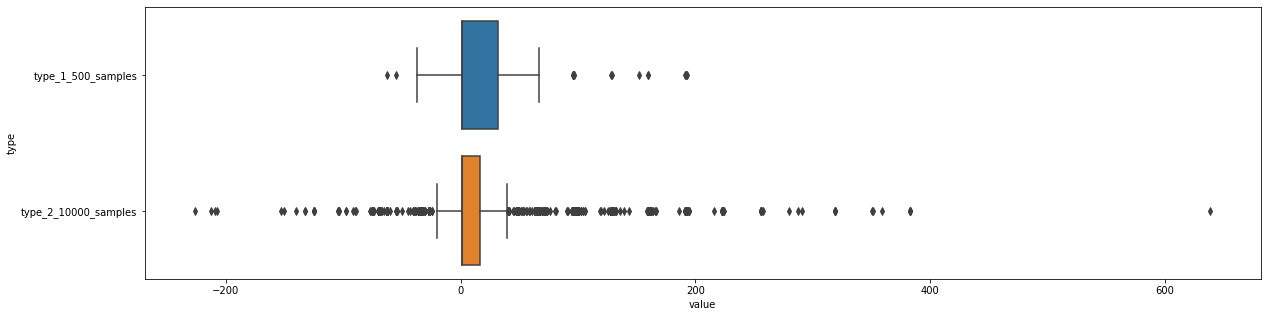

In [69]:
plt.figure(figsize=(20,5))
sns.boxplot(y="type",x='value',data=df)

In [115]:
import numpy as np
bootstrapped_type1 = pd.DataFrame(np.random.choice(formatted_df.type_1.dropna(), size=10000), columns=['value'])
bootstrapped_type1['type'] = "type_1"
bs_df = pd.concat([bootstrapped_type1,df[df.type=='type_2_10000_samples']])
bs_df.loc[bs_df.type=='type_2_10000_samples', 'type']='type_2'

<AxesSubplot:xlabel='value', ylabel='type'>

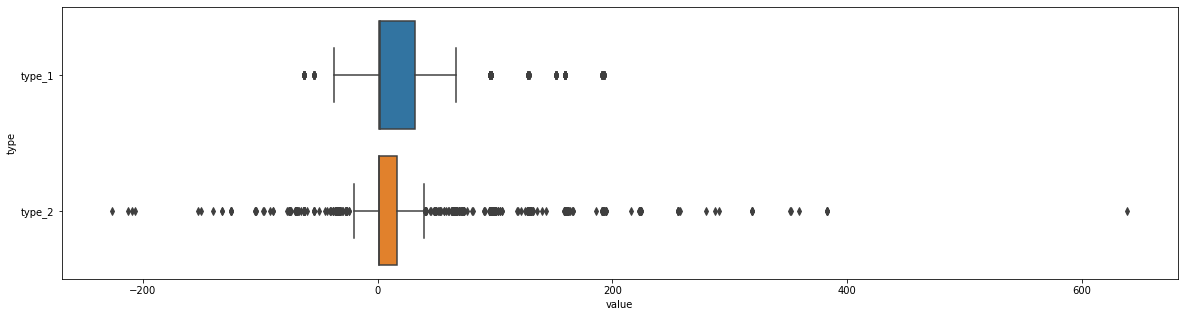

In [118]:
plt.figure(figsize=(20,5))
sns.boxplot(y="type",x='value',data=bs_df)